In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mat

In [2]:
data = pd.read_csv('assessment_data.csv')

In [81]:
data.head()

,target_var,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,blue,29.0000,1,sigma,112.877941
1,1,151.5500,2,1,pink,0.9167,1,sigma,60.291423
2,0,151.5500,2,1,blue,2.0000,1,sigma,143.794103
3,0,151.5500,2,1,pink,30.0000,1,sigma,131.278352
4,0,151.5500,2,1,blue,25.0000,1,sigma,204.415716


In [ ]:
#my first approach to the analysis is cleanning my data so that it is suitable for analysis 

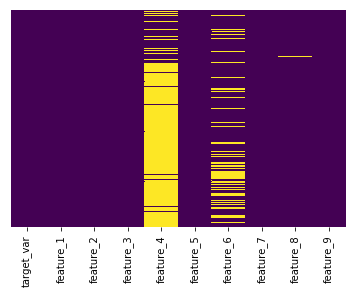

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
# looking at the above heatmap which shows how many NaN values does a column have, so I am going to drop the Feature_4
# because it has so many null values, and that effect will leave us with 8 columns to deal with.

data[['feature_1','feature_6', 'feature_9']].describe()

,feature_1,feature_6,feature_9
count,1308.000000,1046.000000,1309.000000
mean,33.295479,29.881135,101.794120
std,51.758668,14.413500,50.890853
min,0.000000,0.166700,-93.974333
25%,7.895800,21.000000,68.550768
50%,14.454200,28.000000,102.039185
75%,31.275000,39.000000,135.175053
max,512.329200,80.000000,264.692290


In [7]:
data.drop('feature_4', axis=1, inplace= True)

In [ ]:
#This is the results we get after droping the column, and since the Nulls on columns feature_6 and feature_8 I am just 
# going to let them be for now

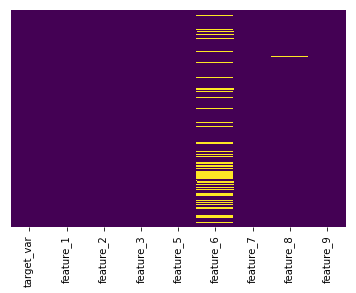

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Caculating Mean, Standard deviations from feature_1, feature_6, feature_9 because they are the only once with actual
# values, but others are just clusters 


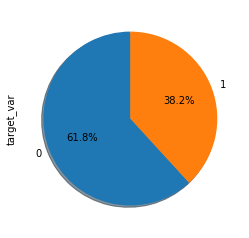

In [73]:
#Target value counts.
data['target_var'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

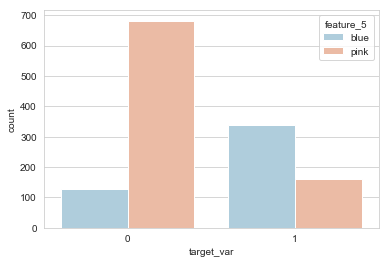

In [75]:
#checking counts for items from feature 5 in the binary expression of target_var
sns.set_style('whitegrid')
sns.countplot(x='target_var',hue='feature_5',data=data,palette='RdBu_r')

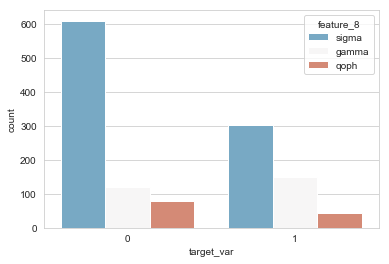

In [76]:
#checking counts for items from feature 8 in the binary expression of target_var
sns.set_style('whitegrid')
sns.countplot(x='target_var',hue='feature_8',data=data,palette='RdBu_r')

In [ ]:
# The next step I will get the percentages for items in feature_6 and feature_8

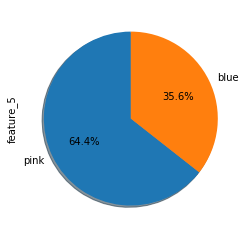

In [12]:
#The pie chart shows that there are more Pinks than blues
data['feature_5'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

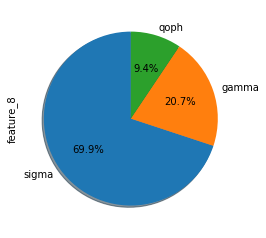

In [13]:
#The pie chart shows that there are more sigmas than gammas and qoph
data['feature_8'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)

mat.gca().set_aspect('equal')

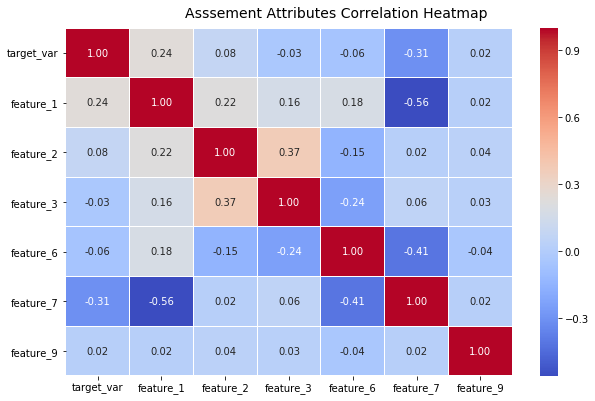

In [14]:
# I am showing data correlation or relationships amongst the features to check how relative they to each other
f, ax = mat.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Asssement Attributes Correlation Heatmap', fontsize=14)

In [ ]:
# Building the model

In [20]:
#developing a new dataset that only consit of columns with numirical values because I only need the numerics to train 
# and test the model

data_1 = data[['feature_1','feature_2','feature_3','feature_6','feature_7','feature_9','target_var']]

In [29]:
data_1.dropna(inplace=True)

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# I am going to use logistics regression to build my model since the values I am predicting are categorical

In [30]:
#Librarying for spliting the data into training data and testing data
from sklearn.model_selection import train_test_split

In [63]:
#spliting the data and assigning it into different variables
# I am going make my test size 50% training data and 50% testing data
X_train, X_test, y_train, y_test = train_test_split(data_1.drop('target_var', axis=1), 
                                                    data_1['target_var'], test_size=0.50)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [64]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
predictions = logmodel.predict(X_test)

In [ ]:
#Model Evaluation

In [79]:
# confusion_metrics
print(confusion_matrix(y_test,predictions))

[[265  66]
 [ 78 114]]


In [66]:
# classification report to check for model accuracy
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.80      0.79       331
          1       0.63      0.59      0.61       192

avg / total       0.72      0.72      0.72       523



In [67]:
#coefficients
logmodel.coef_

array([[ 0.00222696,  0.22091096, -0.25853753, -0.02881604, -0.81233072,
         0.00188549]])

In [72]:
#I use this value to check for accuracy of my models, most accurate model's value sits close to zero
log_loss(y_test,predictions)

9.509821365769657

In [ ]:
# Summary

In [ ]:
# In conclusion
# The are less relationships between the data features

# Techical Summary or Explanation to I saying that the relationships are less
# 1. Looking at the correlation figure above we can clearly see that not many features relate to each other
# 2. Looking at the classication report we have an F1-score value of 72%, which shows the models accuracy on predictions
# 3. Lastly, the log_loss value is around 10, while the value should be between 0 to 1. So if the model's log_loss is above 5
#    then that model is not good, and in this case hence there is no relationship between the features.


In [ ]:
# Non technical users.
# For non technical user summary I used the confussion matrix for evaluation
# From the confussion matrix we focus on two values False-Positive which means for every case in which 0 prediction was
# made when in fact it was a 1 in the original dataset, And False Negative which means for every prediction of 1 
# is made when in fact it was a 0 in the original data set.

In [ ]:
# Non Technical User Summary
# 1. The cost for every 0 prediction made when the original value was 1 Amoounts to R 1 320 000
# 2. The cost for every 1 prediction made when the original value was 0 Amoounts to R 780 000